In [3]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


In [5]:
src.name

'https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif'

In [6]:
src.mode

'r'

In [7]:
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [8]:
src.crs

CRS.from_wkt('LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [9]:
src.bounds

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

In [10]:
src.dtypes

('int16',)

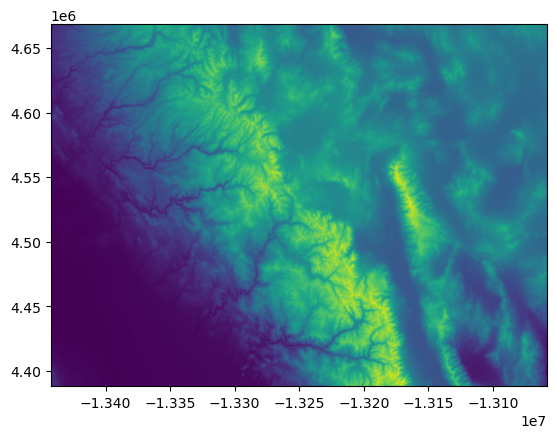

<Axes: >

In [11]:
rasterio.plot.show(src)

<Axes: title={'center': 'Digital Elevation Model (DEM)'}>

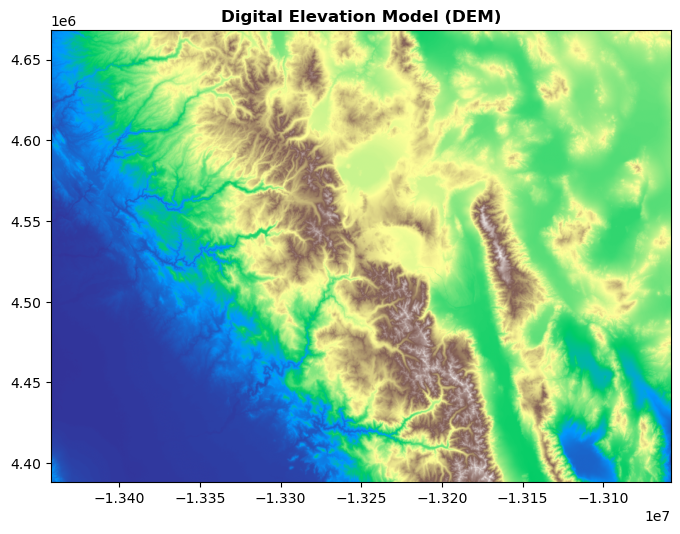

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
#plt.show()

In [23]:
dem_bounds = "https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson"
gdf = gpd.read_file(dem_bounds)

In [27]:
print(gdf.crs)  # Should output a valid CRS or None


EPSG:4326


In [29]:
print(src.crs) 

LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:

from pyproj import CRS

# Read the GeoJSON file
dem_bounds = "https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson"
gdf = gpd.read_file(dem_bounds)

# Ensure gdf has a valid CRS
if gdf.crs is None:
    print("Warning: gdf CRS is missing. Assigning EPSG:4326")
    gdf = gdf.set_crs("EPSG:4326")

# Open raster file
src = rasterio.open("https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif")

# Manually assign the correct EPSG if src.crs is not properly detected
if src.crs is None or "LOCAL_CS" in str(src.crs):
    print("Warning: src CRS is not a standard EPSG. Assigning EPSG:3857 (Pseudo-Mercator).")
    src_crs = "EPSG:3857"  # Adjust if needed
else:
    src_crs = src.crs

# Print CRS information
print("GDF CRS:", gdf.crs)
print("SRC CRS:", src_crs)

# Convert CRS formats to a standard string
gdf_crs = CRS(gdf.crs).to_string()
src_crs = CRS(src_crs).to_string()

# Now reproject to standard EPSG:3857
gdf = gdf.to_crs(src_crs)




GDF CRS: EPSG:4326
SRC CRS: EPSG:3857


<Axes: title={'center': 'Digital Elevation Model (DEM)'}>

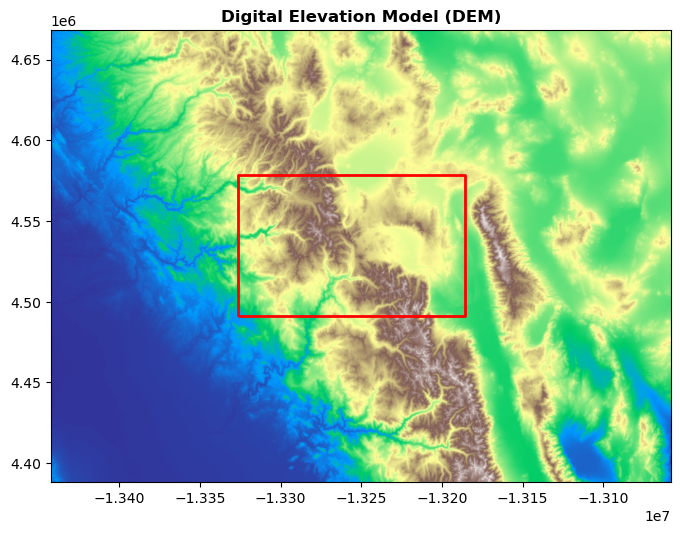

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
gdf.plot(ax=ax, edgecolor="red", facecolor="none", lw=2)

In [36]:
raster_path1 = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
src1 = rasterio.open(raster_path1)
print(src1)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif' mode='r'>


In [38]:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

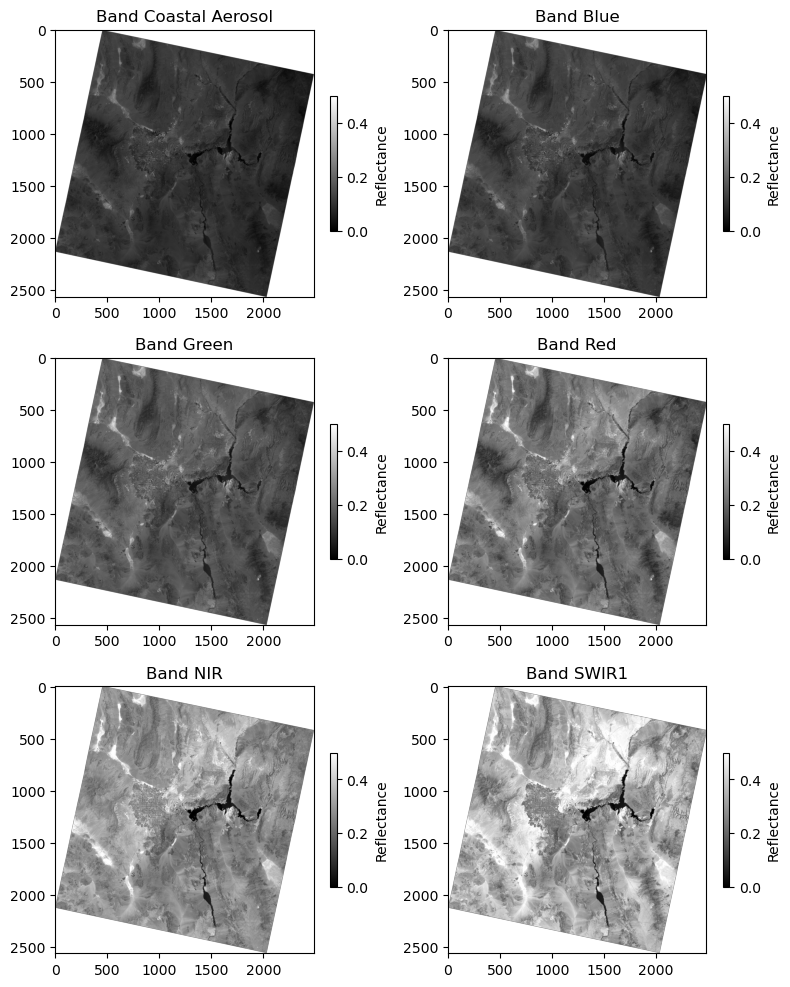

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, src1.count):
    data = src1.read(band)
    ax = axes[band - 1]
    im = ax.imshow(data, cmap="gray", vmin=0, vmax=0.5)
    ax.set_title(f"Band {band_names[band - 1]}")
    fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)

plt.tight_layout()
plt.show()